<a href="https://colab.research.google.com/github/SoonchanGwon/DSML/blob/main/%ED%95%99%EC%83%9D_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab에서 matplotlib 실행시 한글 안나오는 문제 해결 방법
다음을 실행시킨뒤, 런타임 -> 런타임 다시시작 누르기

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False
mpl.font_manager._rebuild()


다음을 실행하여 테스트 해보기

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([-10,10], [-10,10], label='한글테스트용')
plt.title("한글 테스트용", size = 25)
plt.legend()
plt.show()

# 파일 획득 및 업로드하기

* https://github.com/SoonchanGwon/DSML 에서 "분류를 활용한 체격을 보고 초,중,고등학생 예측하기" 
* 파일 2개 다운로드 (datas.csv, data_reader.py)

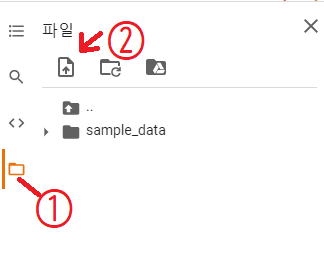
* 다운 받은 파일 업로드

In [ ]:
# 업로드 된 파일 확인
!ls

# 실제 딥러닝 시작

In [5]:
from tensorflow import keras
import data_reader
import pandas as pd
import numpy as np

In [6]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

In [ ]:
# 데이터를 읽어옵니다.
dr = data_reader.DataReader()

In [ ]:
# 불러온 데이터 확인해보기
files = pd.read_csv("datas.csv", encoding="cp949")
files.head()

In [9]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

In [10]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", metrics=["accuracy"],
              loss="sparse_categorical_crossentropy")

In [ ]:
# 인공신경망을 학습시킵니다.
print("************ TRAINING START ************")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

In [ ]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history)

# 모델이 잘 만들어 졌는지 테스트

In [ ]:
# 임의의 데이터 넣기
sex = float(input("성별을 입력해주세요 남:1 여:0 : "))
height = float(input("키를 입력해 주세요 : ")) / 194.2
weight = float(input("체중을 입력해 주세요 : ")) / 130.7

#넣은 데이터를 리스트로 만들기
data = [height, weight, sex]

# 데이터 모양정리 및 넘파이배열로 바꾸기
data = np.reshape(data,(1,3))
data = np.asarray(data)

# 모델을 이용하여 예측하기
guess = model.predict(data)

print("==================================")
print("초등학생일 확률 : ",round(guess[0][0]*100,2),"%")
print("  중학생일 확률 : ",round(guess[0][1]*100,2),"%")
print("고등학생일 확률 : ",round(guess[0][2]*100,2),"%")

# 시각화 해보기

In [ ]:
grade = []
grade.append(guess[0][0]*100)
grade.append(guess[0][1]*100)
grade.append(guess[0][2]*100)

## 데이터
category = ['초등학생', '중학생', '고등학생'] ## 연령 카테고리, x축 눈금에 표시될 라벨
 
## 시각화
plt.figure(figsize=(25,5)) ## Figure 생성 사이즈는 (가로,세로)
xtick_label_position = list(range(len(category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, category) ## x축 눈금 라벨 출력
 
## 바 차트 출력
plt.bar(xtick_label_position, grade)
 
plt.title('학생?',fontsize=20) ## 타이틀 출력
plt.xlabel('학교급') ## x축 라벨 출력
plt.ylabel('확률') ## y축 라벨 출력
plt.show()